In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.style
import matplotlib as mpl
mpl.style.use('ggplot')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from utils.network import GetArchivedFile
g=GetArchivedFile(shortcut="lts")
df=g.get_data_frame()

df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df['Date'] = pd.to_datetime(df['Date']).astype(int)/ 10**9

<http.client.HTTPResponse object at 0x7fbd4a4ca048> <class 'http.client.HTTPResponse'>


In [128]:
X = df.iloc[:, :-5].values
y = df.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc_X, sc_y = StandardScaler(), StandardScaler()
X, y = sc_X.fit_transform(X), sc_y.fit_transform(y.reshape(-1, 1))

# X_prev = X[5000:5500]
# y_prev = y[5000:5500]
# X_next = X[5500:]
# y_next = y[5500:]
X_prev = X[-250:-50]
y_prev = y[-250:-50]
X_next = X[-50:]
y_next = y[-50:]
from sklearn.svm import SVR

_svr = SVR(kernel='rbf' )
_svr.fit(X_prev, y_prev.ravel() )
X.size, y.size, X_prev.size, y_prev.size, X_next.size, y_next.size

(3643, 3643, 200, 200, 50, 50)

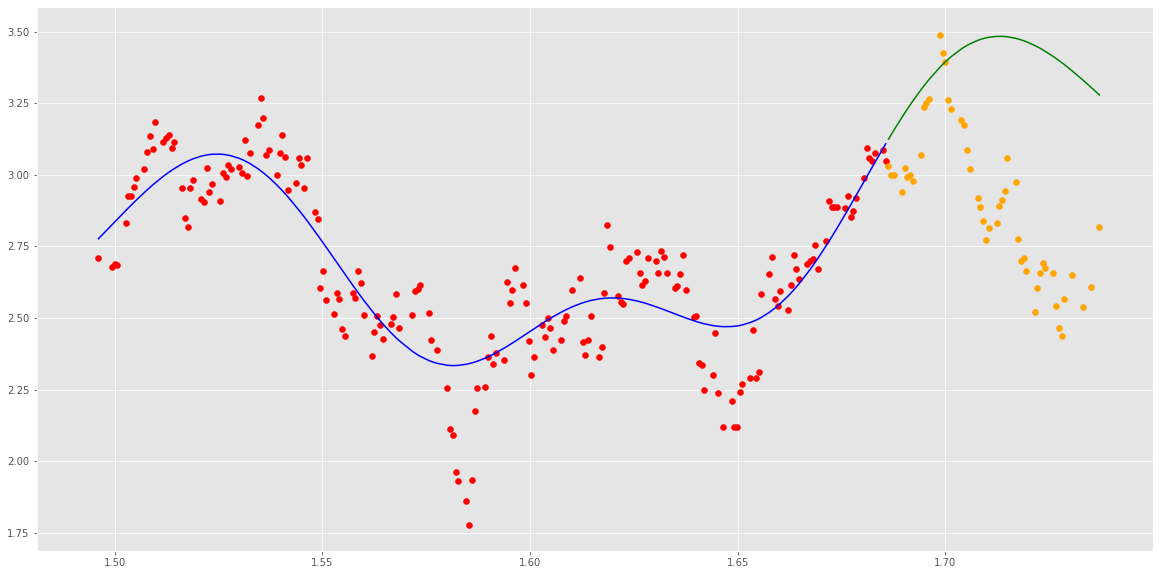

In [129]:
plt.scatter(X_prev, y_prev, color="red")
plt.scatter(X_next, y_next, color="orange")
plt.plot(X_prev, _svr.predict(X_prev), color="blue")
plt.plot(X_next, _svr.predict(X_next), color="green")